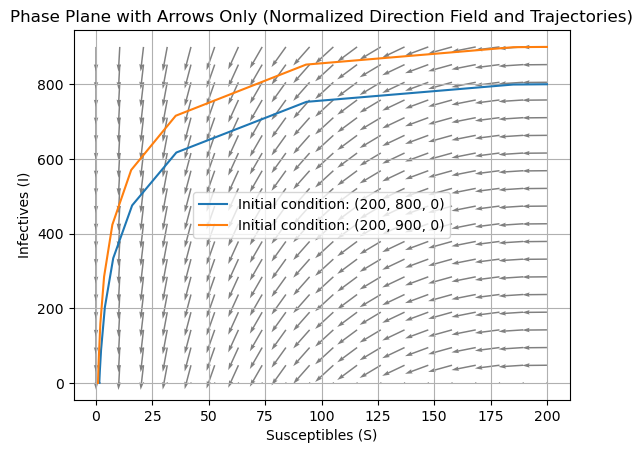

In [3]:
# Import the libraries
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the given system in the form of a lambda function
def system(t, y, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

beta=2.18*10**(-3)
gamma=0.44

# Input the interval of integration
t_span = [0, 100]

# Create an array for various initial conditions
initial_conditions = [(200, 800, 0), (200,900, 0)]

# Define the discrete-time space
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Plot the solution trajectories
for initial_condition in initial_conditions:
    sol = solve_ivp(system, t_span, initial_condition, args=(beta, gamma))
    plt.plot(sol.y[0], sol.y[1], label=f'Initial condition: {initial_condition}')

# Define a function containing the system of differential equations for the direction field
def plot_direction_field(ax, system,beta, gamma, sol):
    x_max = max(sol.y[0].max() for initial_condition in initial_conditions)
    y_max = max(sol.y[1].max() for initial_condition in initial_conditions)
    x = np.linspace(0,x_max, 20)
    y = np.linspace(0, y_max, 20)
    X, Y = np.meshgrid(x, y)
    U, V = system(1000, [X, Y, 0], beta, gamma)[:2]

    # Normalize the vectors
    magnitude = np.sqrt(U**2 + V**2)
    magnitude[magnitude==0]=1
    U /= magnitude
    V /= magnitude

    # Plot the direction field as arrows
    ax.quiver(X, Y, U, V, scale=20, color='gray')

# Create the plot
ax = plt.gca()
plot_direction_field(ax, system, beta, gamma, sol)

# Add labels and legend
plt.xlabel('Susceptibles (S)')
plt.ylabel('Infectives (I)')
plt.title('Phase Plane with Arrows Only (Normalized Direction Field and Trajectories)')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
S,I,R=sp.symbols("S I R")
beta=2.18e-3
gamma=0.44
f=sp.Matrix([(-beta*S*I),(beta*S*I)-(gamma*I),(gamma*I)])
time=[0,10.5]
h=0.7
initial=[762,800,0]
points = np.arange(time[0], time[1] + h, h)

In [19]:
def rk1(f, time, initial, h):
    points = np.arange(time[0], time[1] + h, h) 
    n = len(points)
    sol = np.zeros((len(initial), n))
    
    sol[0, 0] = initial[0]
    sol[1, 0] = initial[1]
    sol[2, 0] = initial[2]

    for i in range(1, n):
        values = {S: sol[0, i-1], I: sol[1, i-1], R: sol[2, i-1]}
        sol[0:, i] = sol[0:, i-1] + h * f.subs(values)[0]
        sol[1:, i] = sol[1:, i-1] + h * f.subs(values)[1]
        sol[2:, i] = sol[2:, i-1] + h * f.subs(values)[2]
    return sol

In [20]:
def rk2(f1,time,initial,h):  #define the function
    points=np.arange(time[0],time[1]+h,h) #divide the interval
    n=len(points) #how points are there
    sol=np.zeros((len(initial),n)) #to store the solutions of y
    sol[0]=initial[0]
    sol[1]=initial[1]
    sol[2]=initial[2]
    for i in range(1,n):
        k1=f.subs({S:sol[0,i-1],I:sol[1,i-1],R:sol[2,i-1]})
        k2=f.subs({S:sol[0,i-1]+h*k1[0],I:sol[1,i-1]+h*k1[1],R:sol[2,i-1]+h*k1[2]})
        sol[0:,i]=sol[0,i-1]+h/2*(k1[0]+k2[0])
        sol[1:,i]=sol[1,i-1]+h/2*(k1[1]+k2[1])
        sol[2:,i]=sol[2,i-1]+h/2*(k1[2]+k2[2])

    return sol

In [21]:
def rk4(f1,time,initial,h):  #define the function
    points=np.arange(time[0],time[1]+h,h) #divide the interval
    n=len(points) #how points are there
    sol=np.zeros((len(initial),n)) #to store the solutions of y
    sol[0]=initial[0]
    sol[1]=initial[1]
    sol[2]=initial[2]
    for i in range(1,n):
        k1=f.subs({S:sol[0,i-1],I:sol[1,i-1],R:sol[2,i-1]})
        k2=f.subs({S:sol[0,i-1]+h/2*k1[0],I:sol[1,i-1]+h/2*k1[1],R:sol[2,i-1]+h/2*k1[2]})
        k3=f.subs({S:sol[0,i-1]+h/2*k2[0],I:sol[1,i-1]+h/2*k2[1],R:sol[2,i-1]+h/2*k2[2]})
        k4=f.subs({S:sol[0,i-1]+h*k3[0],I:sol[1,i-1]+h*k3[1],R:sol[2,i-1]+h*k3[2]})
        sol[0:,i]=sol[0,i-1]+h/6*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
        sol[1:,i]=sol[1,i-1]+h/6*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
        sol[2:,i]=sol[2,i-1]+h/6*(k1[2]+2*k2[2]+2*k3[2]+k4[2])
    return sol

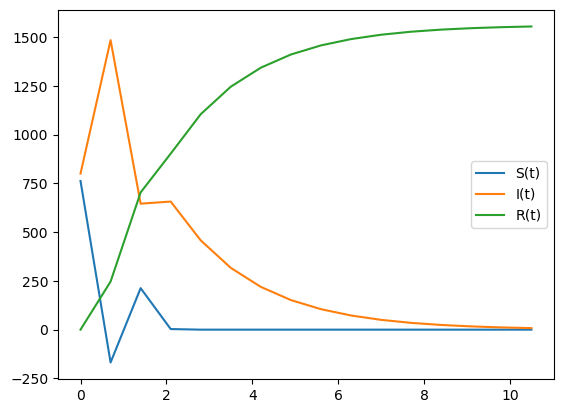

In [22]:
Euler_sol=rk1(f,time,initial,h)
fig,ax=plt.subplots()
ax.plot(points,Euler_sol[0],label="S(t)")
ax.plot(points,Euler_sol[1],label="I(t)")
ax.plot(points,Euler_sol[2],label="R(t)")
ax.legend()

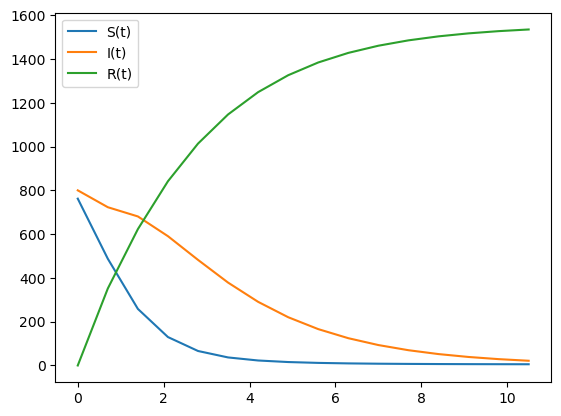

In [23]:
rk2_method=rk2(f,time,initial,h)
fig,ax=plt.subplots()
ax.plot(points,rk2_method[0],label="S(t)")
ax.plot(points,rk2_method[1],label="I(t)")
ax.plot(points,rk2_method[2],label="R(t)")
ax.legend()

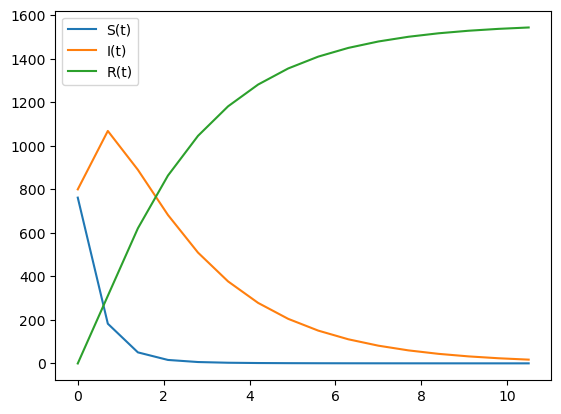

In [24]:
rk4_method=rk4(f,time,initial,h)
fig,ax=plt.subplots()
ax.plot(points,rk4_method[0],label="S(t)")
ax.plot(points,rk4_method[1],label="I(t)")
ax.plot(points,rk4_method[2],label="R(t)")
ax.legend()

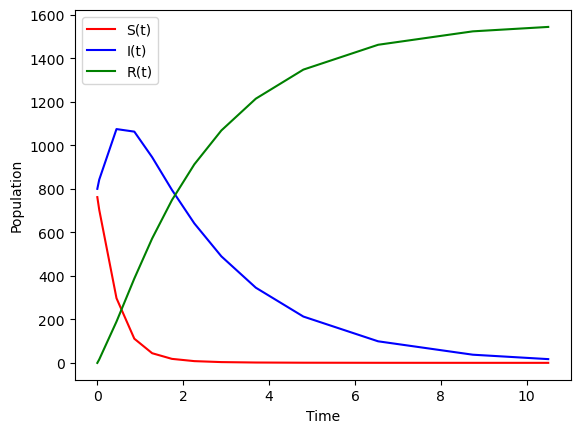

In [25]:
def model(t, y):
    S, I, R = y
    f1= -(2.18*10**(-3)) * S * I
    f2 = (2.18*10**(-3)) * S * I - 0.44 * I
    f3 = 0.44 * I
    return [f1, f2, f3]
rk45= solve_ivp(model, time, initial, method='RK45',t_eval=None)
fig, ax = plt.subplots()
ax.plot(rk45.t, rk45.y[0], color="red", label="S(t)")
ax.plot(rk45.t, rk45.y[1], color="blue", label="I(t)")
ax.plot(rk45.t, rk45.y[2], color="green", label="R(t)")
ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.legend()
plt.show()

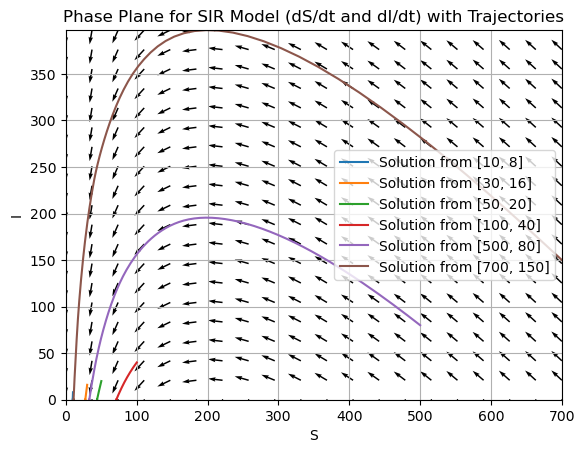

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

# Define symbolic variables
S, I = sp.symbols('S I')
beta = 2.18e-3  # Transmission coefficient
gamma = 0.44    # Recovery rate

# Define the differential equations symbolically for S and I
dSdt = -beta * S * I
dIdt = beta * S * I - gamma * I

# Define the system of equations
ode_system = [dSdt, dIdt]

# Convert symbolic equations to functions
system_eq = sp.lambdify((S, I), ode_system)

# Define the time span
t_span = (0, 100)  # Time interval for integration

# Define the initial conditions and array of initial conditions
initial_conditions = [
    [10, 8],
    [30, 16],
    [50, 20],
    [100, 40],
    [500, 80],
    [700, 150]
]

# Find the maximum values of trajectories over x and y axes
max_x, max_y = 0, 0
for y0 in initial_conditions:
    sol = solve_ivp(
        lambda t, y: system_eq(*y),
        t_span,
        y0,
        t_eval=np.linspace(t_span[0], t_span[1], 1000)
    )
    max_x = max(max_x, np.max(sol.y[0]))
    max_y = max(max_y, np.max(sol.y[1]))

# Create a discrete space for x and y based on the obtained maximum values
x_vals = np.linspace(0, max_x, 20)
y_vals = np.linspace(0, max_y, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate direction field using the system of equations
U, V = system_eq(X, Y)

# Normalize the obtained slope points
N = np.sqrt(U**2 + V**2)
N[N==0]=1
U /= N
V /= N

# Plot the direction field
plt.quiver(X, Y, U, V, angles='xy')

# Plot the solution trajectories
for y0 in initial_conditions:
    sol = solve_ivp(
        lambda t, y: system_eq(*y),
        t_span,
        y0,
        t_eval=np.linspace(t_span[0], t_span[1], 1000)
    )
    plt.plot(sol.y[0], sol.y[1], label=f'Solution from {y0}')

# Labeling and Plotting
plt.xlabel('S')
plt.ylabel('I')
plt.title('Phase Plane for SIR Model (dS/dt and dI/dt) with Trajectories')
plt.xlim(0, max_x)
plt.ylim(0, max_y)
plt.legend()
plt.grid()
plt.show()

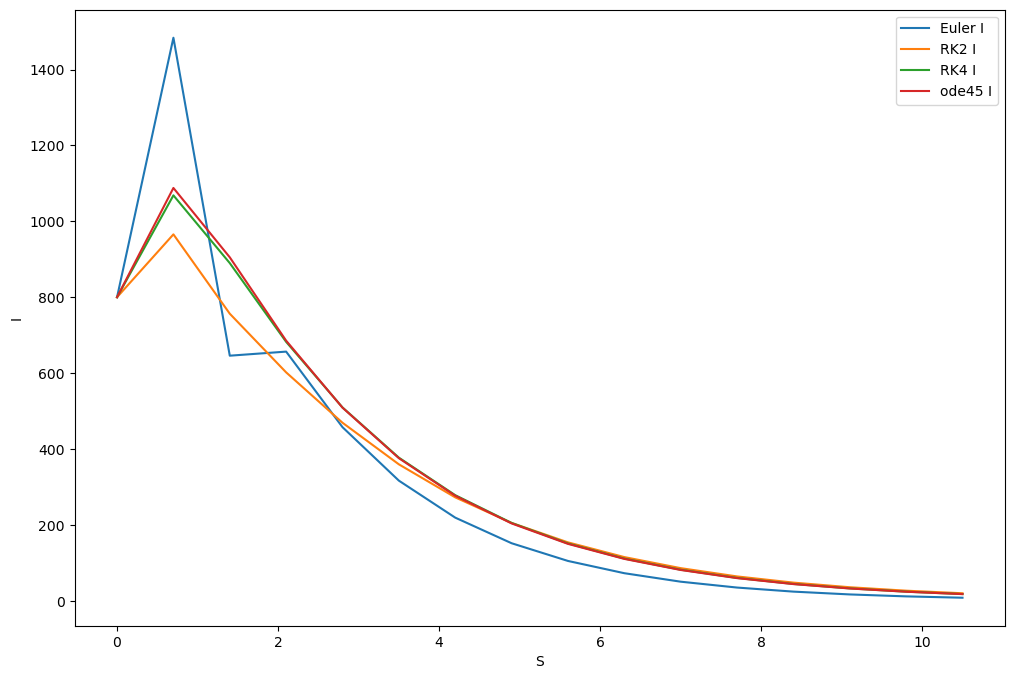

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
beta = 2.18e-3  # Transmission coefficient
gamma = 0.44    # Recovery rate
t_span = (0, 10.5)
step_size = 0.7
t_eval = np.arange(t_span[0], t_span[1] + step_size, step_size)
S0, I0, R0 = 762, 800, 0  # Initial conditions

# System of ODEs
def sir_model(t, y):
    S, I, R = y
    return [-beta * S * I, beta * S * I - gamma * I, gamma * I]

# Euler Method
def euler_method(func, t, y0):
    y = np.zeros((len(y0), len(t)))
    y[:, 0] = y0
    for i in range(1, len(t)):
        y[:, i] = y[:, i-1] + step_size * np.array(func(t[i-1], y[:, i-1]))
    return y

# RK-2 Method
def rk2_method(func, t, y0):
    y = np.zeros((len(y0), len(t)))
    y[:, 0] = y0
    for i in range(1, len(t)):
        k1 = step_size * np.array(func(t[i-1], y[:, i-1]))
        k2 = step_size * np.array(func(t[i-1] + step_size/2, y[:, i-1] + k1/2))
        y[:, i] = y[:, i-1] + k2
    return y

# RK-4 Method
def rk4_method(func, t, y0):
    y = np.zeros((len(y0), len(t)))
    y[:, 0] = y0
    for i in range(1, len(t)):
        k1 = step_size * np.array(func(t[i-1], y[:, i-1]))
        k2 = step_size * np.array(func(t[i-1] + step_size/2, y[:, i-1] + k1/2))
        k3 = step_size * np.array(func(t[i-1] + step_size/2, y[:, i-1] + k2/2))
        k4 = step_size * np.array(func(t[i-1] + step_size, y[:, i-1] + k3))
        y[:, i] = y[:, i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

# Solve using Euler, RK2, RK4, and ode45
y_euler = euler_method(sir_model, t_eval, [S0, I0, R0])
y_rk2 = rk2_method(sir_model, t_eval, [S0, I0, R0])
y_rk4 = rk4_method(sir_model, t_eval, [S0, I0, R0])
sol_ode45 = solve_ivp(sir_model, t_span, [S0, I0, R0], method='RK45', t_eval=t_eval)

# Plotting the results
plt.figure(figsize=(12, 8))

plt.plot(t_eval, y_euler[1], label='Euler I')


plt.plot(t_eval, y_rk2[1], label='RK2 I')


plt.plot(t_eval, y_rk4[1], label='RK4 I')



plt.plot(sol_ode45.t, sol_ode45.y[1], label='ode45 I')



plt.xlabel('S')
plt.ylabel('I')
plt.legend()
plt.show()